In [57]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
%matplotlib inline

In [58]:
cwd = os.getcwd()
os.getcwd()

'C:\\Users\\Steven\\Documents\\Python Scripts\\WineClassification'

In [59]:
data = pd.read_csv('data.csv')
data.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001585A908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000169D7BA8>]], dtype=object)

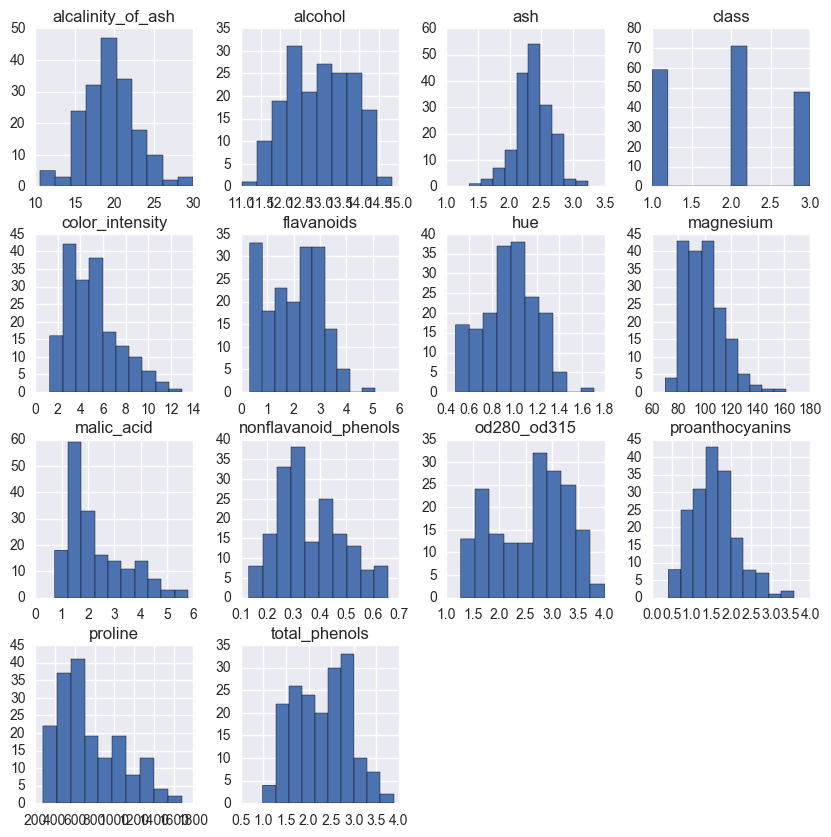

In [60]:
#data viz

pd.DataFrame.hist(data, figsize = [10, 10])

In [61]:
#train test split

X, y = data.drop('class', axis = 1), data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [62]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.68888888888888888

In [63]:
y_true, y_pred = y_test, knn.predict(X_test)
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          1       0.88      0.83      0.86        18
          2       0.67      0.71      0.69        17
          3       0.40      0.40      0.40        10

avg / total       0.69      0.69      0.69        45



In [64]:
#check different values of k

scores = []
for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
scores

[0.71111111111111114,
 0.66666666666666663,
 0.68888888888888888,
 0.64444444444444449,
 0.68888888888888888,
 0.64444444444444449,
 0.64444444444444449,
 0.66666666666666663,
 0.71111111111111114,
 0.66666666666666663,
 0.71111111111111114,
 0.73333333333333328,
 0.71111111111111114,
 0.75555555555555554,
 0.71111111111111114,
 0.71111111111111114,
 0.75555555555555554,
 0.71111111111111114,
 0.73333333333333328,
 0.71111111111111114,
 0.71111111111111114,
 0.71111111111111114,
 0.71111111111111114,
 0.71111111111111114]

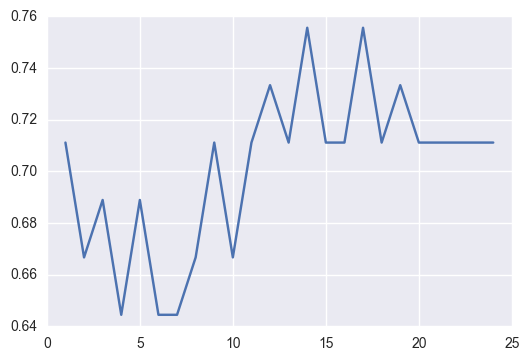

In [65]:
plt.plot(range(1, 25), scores)

In [66]:
knn = KNeighborsClassifier(n_neighbors = 14)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.75555555555555554

In [68]:
#scale data

normalized_X = preprocessing.normalize(X)

In [69]:
X_scaled = pd.DataFrame(
    normalized_X,
    index = X.index,
    columns = X.columns
)

X_scaled.head()

In [70]:
#knn with scaled data

X_train_scaled, X_test, y_train_scaled, y_test = train_test_split(X_scaled, y, random_state = 1)

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_scaled, y_train_scaled)
knn.score(X_test, y_test)

0.80000000000000004

In [72]:
#check different values of k

scores = []
for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_scaled, y_train_scaled)
    scores.append(knn.score(X_test, y_test))
    
scores

[0.75555555555555554,
 0.80000000000000004,
 0.80000000000000004,
 0.77777777777777779,
 0.80000000000000004,
 0.82222222222222219,
 0.75555555555555554,
 0.73333333333333328,
 0.68888888888888888,
 0.73333333333333328,
 0.71111111111111114,
 0.73333333333333328,
 0.68888888888888888,
 0.73333333333333328,
 0.71111111111111114,
 0.73333333333333328,
 0.73333333333333328,
 0.73333333333333328,
 0.73333333333333328,
 0.68888888888888888,
 0.73333333333333328,
 0.73333333333333328,
 0.73333333333333328,
 0.71111111111111114]

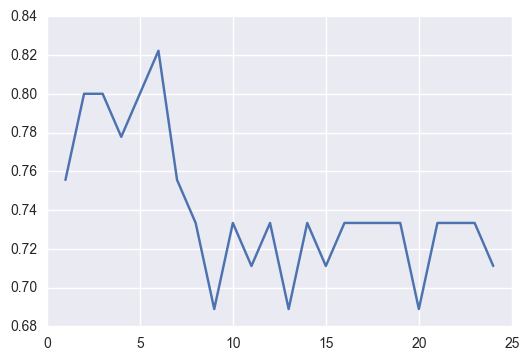

In [73]:
plt.plot(range(1, 25), scores)

In [74]:
#knn with scaled data and k = 6

X_train_scaled, X_test, y_train_scaled, y_test = train_test_split(X_scaled, y, random_state = 1)

knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train_scaled, y_train_scaled)
knn.score(X_test, y_test)

0.82222222222222219